## Bin filtering and normalization

__running time__: < 10 min

Columns in the matrix with significantly less interaction counts than the rest are likely to be genomic regions with low mappability or high repeat content like telomeres and centromeres. The consideration of those columns affect the performance and accuracy of most normalization algorithms. It is therefore necessary to discard those columns prior to the normalization of the matrix.

`tadbit normalize` performs a bin filtering before the normalization.

### Filter bins with low interaction counts

#### Genome-wide filtering

In `tadbit normalize` the default measure to consider if a column should be filtered out is the percentage of cis interactions (inter-chromosomal) over the total. Artifactual columns with a percentage of cis interactions below the estimated minimum percentage or above the estimated maximum percentage are discarded.

![Bin filtering](images/cis_ratio_histogram.png)

#### Threshold filtering

In cases where the default methodology cannot be applied (for instance in sparse datasets or when we only have one chromosome) we can use thresholds with absolute values (`--min_count`) or percentages (`--perc_zeros`,`--min_perc`,`--max_perc`).

### Normalization algorithms

*__Note__: if columns with a lot of zeroes are present the ICE normalization will last very long to converge, and these low-coverage columns will present, at the end of the normalization, few cells with very high values of interaction*

### Iterative Correction and Eigenvector decomposition (ICE)

ICE normalization <a name="ref-1"/>[(Imakaev et al., 2012)](#cite-Imakaev2012a) assumes an equal experimental visibility of each bin and seeks iteratively for biases that equalize the sum of counts per bin in the matrix. At each iteration, a new matrix is generated by dividing each cell by the product of the sum of counts in its row times the sum of counts in its column. The process converges to a matrix in which all bins have identical sum.

If $W$ is the raw matrix, $N$ is its size, and $i$($j$) the index of the columns(rows), the normalized matrix $M$ is iteratively computed as:

$$M_{i,j} = \frac{W_{i,j}}{\sqrt{\sum_{n=0}^N{W_{i,n}} \times \sum_{n=0}^N{W_{n,j}}}}$$

This normalization has usually a quite strong effect, and visually the matrices look very smooth and regular.

In [1]:
%%bash

tadbit normalize -w ../results/PSC_rep1/ --normalization ICE \
    --resolution 10000 --min_count 100

  - Parsing BAM (101 chunks)                                                   [2021-10-04 22:10:07]
     .......... .......... .......... .......... ..........     50/101
     .......... .......... .......... .......... ..........    100/101
     .                                                         101/101

  - Collecting cis and total interactions per bin (101 chunks)                 [2021-10-04 22:10:11]
     .......... .......... .......... .......... ..........     50/101
     .......... .......... .......... .......... ..........    100/101
     .
  - Removing columns with too few or too much interactions                     [2021-10-04 22:10:12]
      -> too few interactions defined as less than       100 interactions
      -> removed 387 columns (342/387 null/high counts) of 15975 (2.4%)
  - Rescaling sum of interactions per bins                                     [2021-10-04 22:10:12]
  - ICE normalization                                                          [2021-10

The resulting biases are stored in a pickle file under the subfolder `04_normalization` and are only valid for matrices binned at 50kbp resolution. Together with the biases file, `tadbit normalize` produces a plot of the relation between the genomic distance of two regions of the genome and the number of read pairs (interaction counts) having sequences mapped on to those two regions on each end:

In [2]:
%%bash

ls ../results/PSC_rep1/04_normalization/

biases_10kb_9eb56390cc.pickle
interactions_vs_genomic-coords.png_10000_9eb56390cc.png


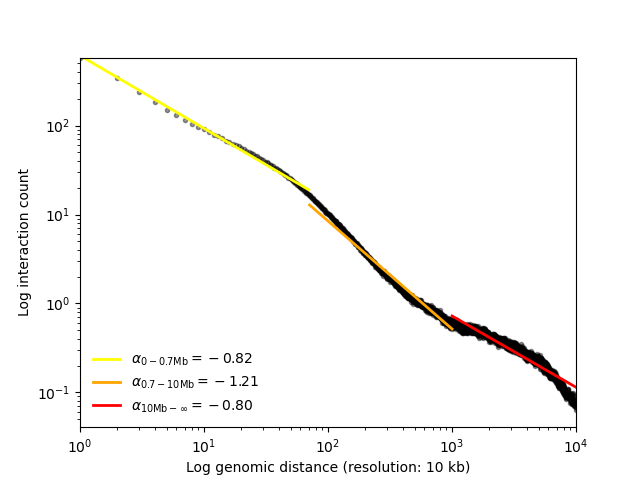

In [4]:
from IPython.display import Image
Image(filename='../results/PSC_rep1/04_normalization/interactions_vs_genomic-coords.png_10000_9eb56390cc.png')

In [5]:
%%bash

tadbit bin -w ../results/PSC_rep1/ --only_plot \
    -c chr3:33950000-35450000 --resolution 10000  \
    --cmap Reds --format png \
    --norm raw norm


Extraction of chr3:33950000-35450000
Getting raw matrices                                                           [2021-10-04 22:14:05]

  (Matrix size 150x150)                                                        [2021-10-04 22:14:05]

  - Parsing BAM (75 chunks)                                                    [2021-10-04 22:14:05]
     .......... .......... .......... .......... ..........      50/75
     .......... .......... .....                                 75/75

  - Getting matrices                                                           [2021-10-04 22:14:05]
     .......... .......... .......... .......... ..........      50/75
     .......... .......... .....                                 75/75

 - Plotting: raw                                                               [2021-10-04 22:14:06]
Getting norm matrices                                                          [2021-10-04 22:14:07]

  (Matrix size 150x150)                                            

Raw matrix 50kb

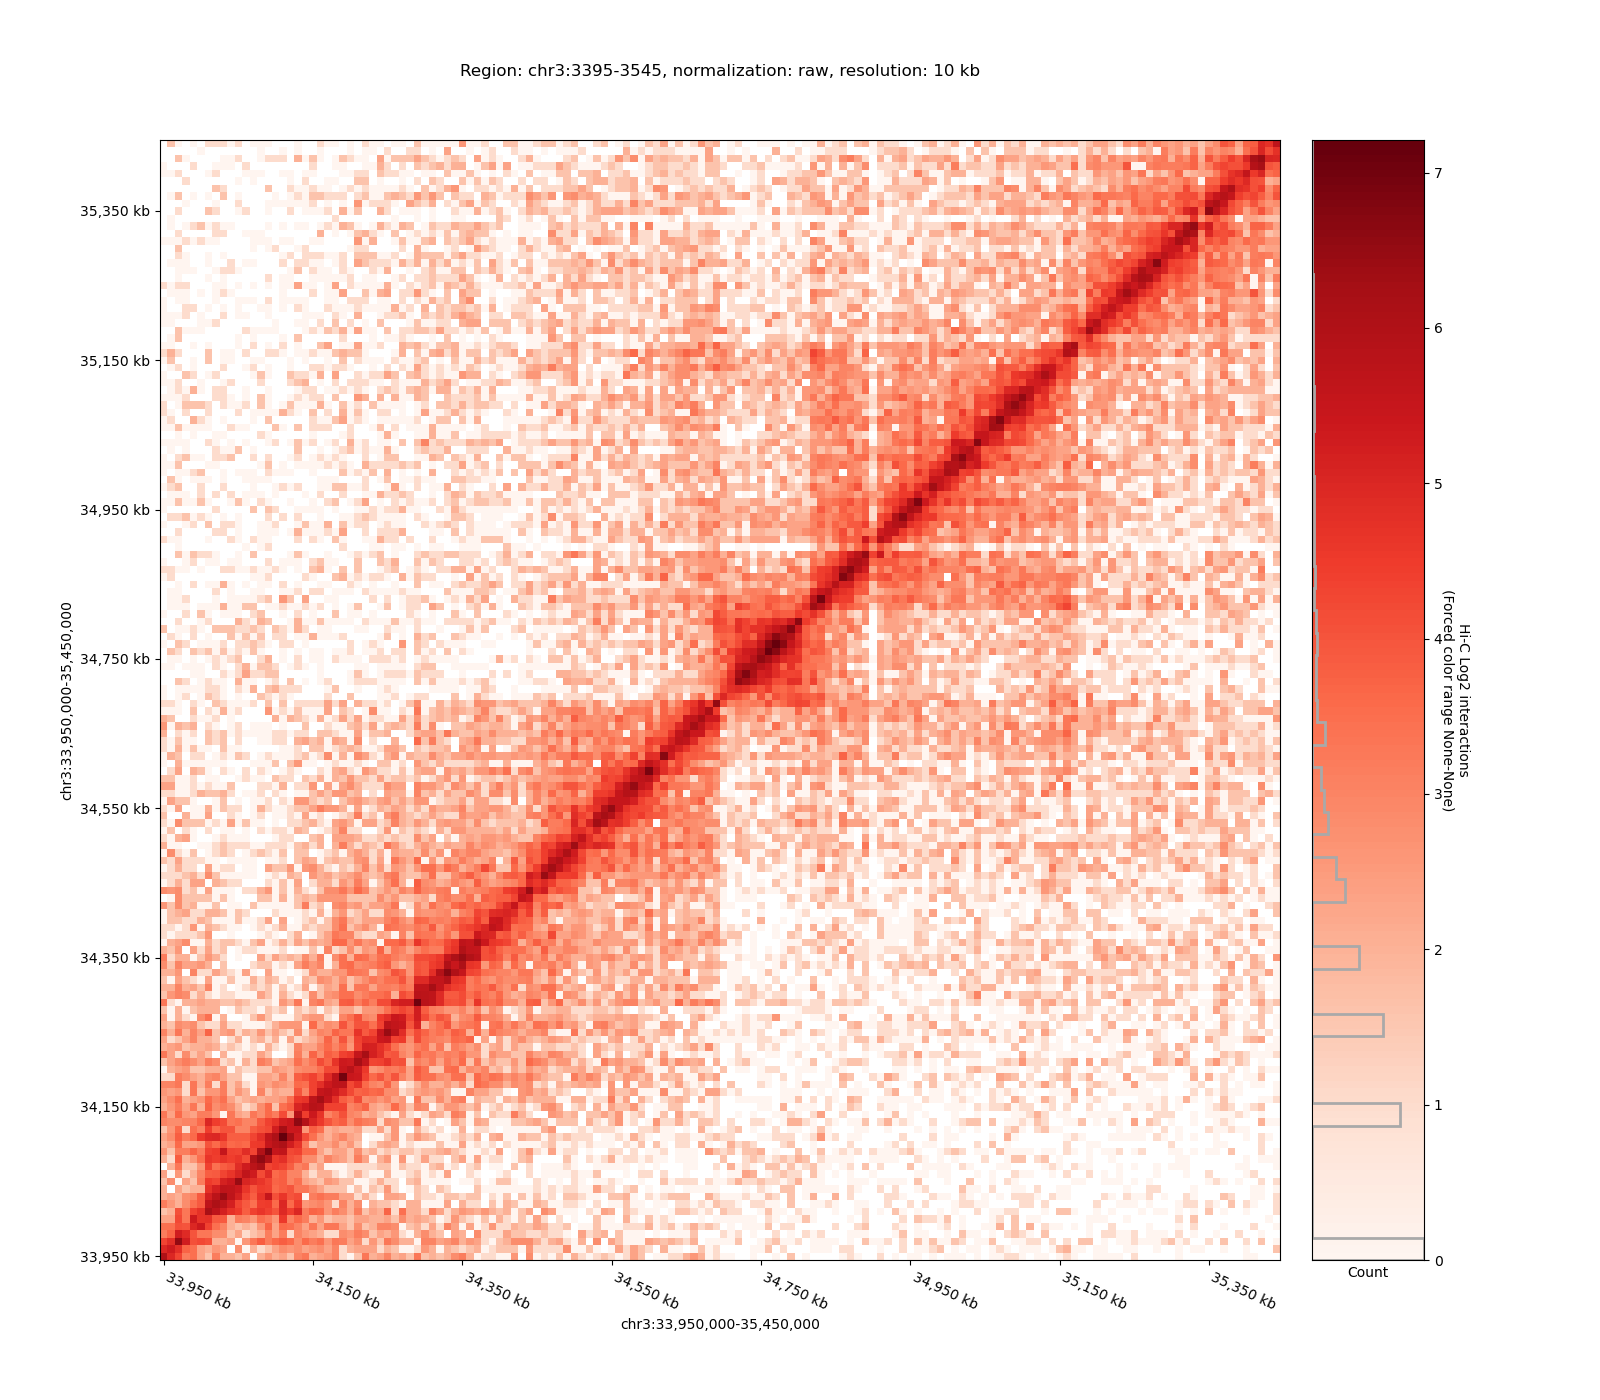

In [7]:
Image(filename='../results/PSC_rep1/05_sub-matrices/raw_chr3:3395-3545_10kb_bab7be0e72.png')

ICE normalized matrix 50kb

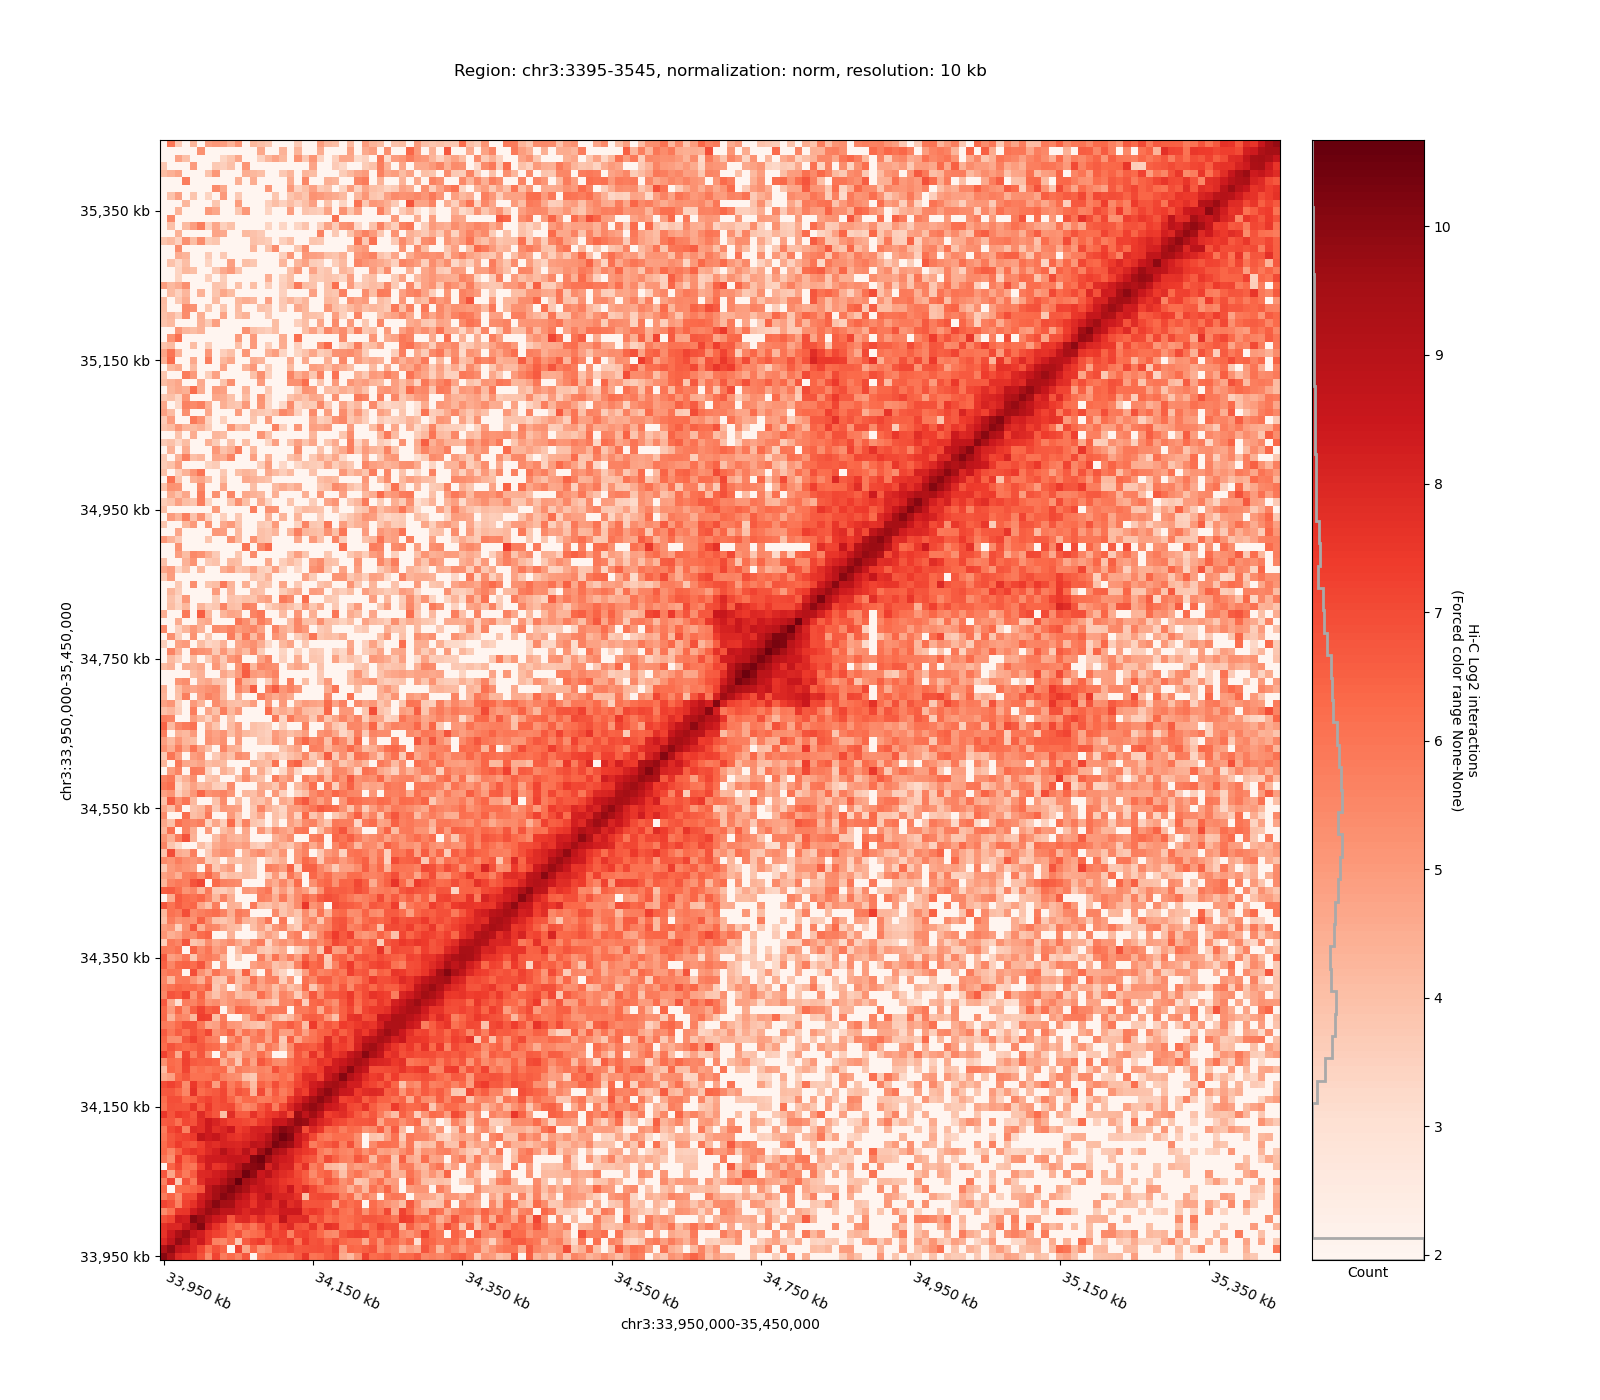

In [8]:
Image(filename='../results/PSC_rep1/05_sub-matrices/nrm_chr3:3395-3545_10kb_bab7be0e72.png')

### Vanilla coverage normalization

The vanilla normalization <a name="ref-2"/>[(Rao et al., 2014)](#cite-Rao2014) is a variation of the ICE where a single iteration is performed.

In [9]:
%%bash

tadbit normalize -w ../results/PSC_rep1/ --normalization Vanilla \
    --resolution 10000 --min_count 100

  - Parsing BAM (101 chunks)                                                   [2021-10-04 22:14:46]
     .......... .......... .......... .......... ..........     50/101
     .......... .......... .......... .......... ..........    100/101
     .                                                         101/101

  - Collecting cis and total interactions per bin (101 chunks)                 [2021-10-04 22:14:49]
     .......... .......... .......... .......... ..........     50/101
     .......... .......... .......... .......... ..........    100/101
     .
  - Removing columns with too few or too much interactions                     [2021-10-04 22:14:51]
      -> too few interactions defined as less than       100 interactions
      -> removed 387 columns (342/387 null/high counts) of 15975 (2.4%)
  - Rescaling sum of interactions per bins                                     [2021-10-04 22:14:51]
  - Vanilla normalization                                                      [2021-10

In [10]:
%%bash

tadbit bin -w ../results/PSC_rep1/ --only_plot \
    -c chr3:33950000-35450000 --resolution 10000  \
    --cmap Reds --format png \
    --norm norm \
    --jobid 9


Extraction of chr3:33950000-35450000
Getting norm matrices                                                          [2021-10-04 22:15:08]

  (Matrix size 150x150)                                                        [2021-10-04 22:15:08]

  - Parsing BAM (75 chunks)                                                    [2021-10-04 22:15:08]
     .......... .......... .......... .......... ..........      50/75
     .......... .......... .....                                 75/75

  - Getting matrices                                                           [2021-10-04 22:15:08]
     .......... .......... .......... .......... ..........      50/75
     .......... .......... .....                                 75/75

 - Plotting: norm                                                              [2021-10-04 22:15:09]
Cleaning                                                                       [2021-10-04 22:15:10]
Saving to DB                                                        

Vanilla normalized matrix 50kb

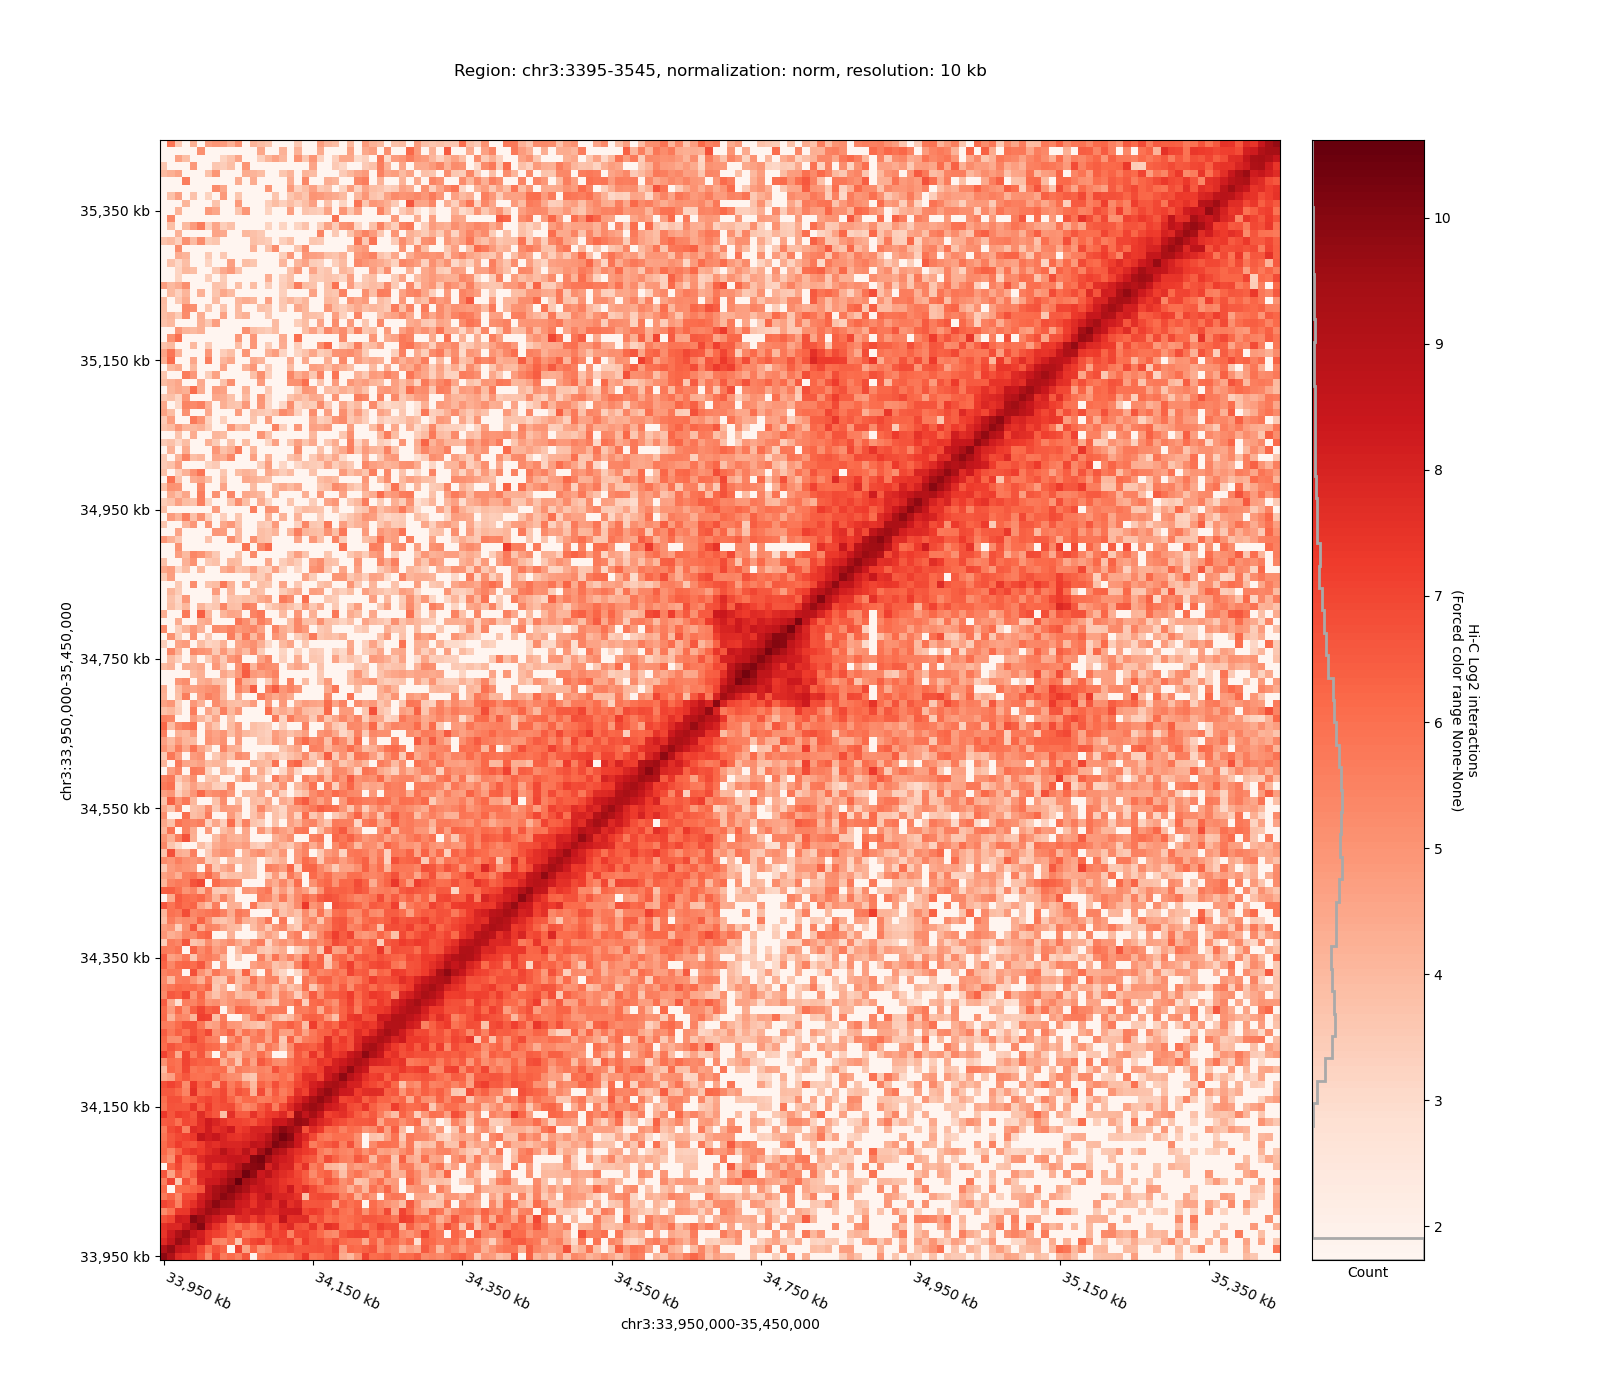

In [11]:
Image(filename='../results/PSC_rep1/05_sub-matrices/nrm_chr3:3395-3545_10kb_e89b5aa69f.png')

### Square root vanilla coverage (SQRT) normalization

The SQRT vanilla normalization <a name="ref-2"/>[(Rao et al., 2014)](#cite-Rao2014) is a variation of the Vanilla coverage where each element in the matrix is divided by the square root of the product of sums of counts.

$$M_{i,j} = \frac{W_{i,j}}{\sqrt{\sum_{n=0}^N{W_{i,n}} \times \sum_{n=0}^N{W_{n,j}}}}$$

In [12]:
%%bash

tadbit normalize -w ../results/PSC_rep1/ --normalization SQRT \
    --resolution 10000 --min_count 100

  - Parsing BAM (101 chunks)                                                   [2021-10-04 22:15:30]
     .......... .......... .......... .......... ..........     50/101
     .......... .......... .......... .......... ..........    100/101
     .                                                         101/101

  - Collecting cis and total interactions per bin (101 chunks)                 [2021-10-04 22:15:33]
     .......... .......... .......... .......... ..........     50/101
     .......... .......... .......... .......... ..........    100/101
     .
  - Removing columns with too few or too much interactions                     [2021-10-04 22:15:35]
      -> too few interactions defined as less than       100 interactions
      -> removed 387 columns (342/387 null/high counts) of 15975 (2.4%)
  - Rescaling sum of interactions per bins                                     [2021-10-04 22:15:35]
  - Vanilla-SQRT normalization                                                 [2021-10

In [13]:
%%bash

tadbit bin -w ../results/PSC_rep1/ --only_plot \
    -c chr3:33950000-35450000 --resolution 10000  \
    --cmap Reds --format png \
    --norm norm \
    --jobid 11


Extraction of chr3:33950000-35450000
Getting norm matrices                                                          [2021-10-04 22:15:52]

  (Matrix size 150x150)                                                        [2021-10-04 22:15:52]

  - Parsing BAM (75 chunks)                                                    [2021-10-04 22:15:52]
     .......... .......... .......... .......... ..........      50/75
     .......... .......... .....                                 75/75

  - Getting matrices                                                           [2021-10-04 22:15:52]
     .......... .......... .......... .......... ..........      50/75
     .......... .......... .....                                 75/75

 - Plotting: norm                                                              [2021-10-04 22:15:53]
Cleaning                                                                       [2021-10-04 22:15:54]
Saving to DB                                                        

SQRT normalized matrix 50kb

In [ ]:
Image(filename='../results/PSC_rep1/05_sub-matrices/nrm_chr3:3395-3545_10kb_94045bfce3.png')

### OneD normalization

OneD normalization <a name="ref-3"/>[(Vidal et al., 2018)](#cite-Vidal2018) is based on fitting a non-linear model between the total amount of contacts per bin and the known biases:
 - GC content
 - number of RE sites (the most important bias, the more cut sites, the more mapped reads)
 - read mappability (can be produced with genmap https://github.com/cpockrandt/genmap)

As the estimation of each of this statistics is very important for the normalization, they are left outside the normalization function, in order to allow user to modify them.

In [ ]:
%%bash

tadbit normalize -w ../results/PSC_rep1/ --normalization oneD \
    --resolution 10000 --min_count 100 \
    --fasta ../refGenome/mm39_chr3.fa \
    --renz MboI \
    --mappability ../refGenome/genmap/mappability/mm39_chr3.genmap.bedgraph

In [ ]:
%%bash

tadbit bin -w ../results/PSC_rep1/ --only_plot \
    -c chr3:33950000-35450000 --resolution 10000  \
    --cmap Reds --format png \
    --norm norm \
    --jobid 13

oneD normalized matrix 50kb

In [ ]:
Image(filename='../results/PSC_rep1/05_sub-matrices/nrm_chr3:3395-3545_10kb_0c74b80961.png')

### Other normalizations

ICE and Vanilla normalizations are widely used however other, more convoluted, normalizations <a name="ref-4"/>[(Hu et al., 2012)](#cite-hu2012hicnorm) <a name="ref-5"/>[(Yaffe and Tanay, 2011)](#cite-Yaffe2011) can be used outside TADbit and then loaded in TADbit as normalized matrices for further analysis.

### Best normalization

Which is the best normalization to use is a question that can not be answered easily because it depends on the type of data and the type of analysis.

Most of the time Hi-C experiments are conducted in different conditions and, for each, in several replicates. A good way to find the best normalization method may be to select the one that achieve to minimize the differences between replicates and maximize the differences between conditions (this in the context of the analysis to be performed).

<!--bibtex
@article{hu2012hicnorm,
  title={HiCNorm: removing biases in Hi-C data via Poisson regression},
  author={Hu, Ming and Deng, Ke and Selvaraj, Siddarth and Qin, Zhaohui and Ren, Bing and Liu, Jun S},
  journal={Bioinformatics},
  volume={28},
  number={23},
  pages={3131--3133},
  year={2012},
  publisher={Oxford Univ Press}
}
@article{Yaffe2011,
abstract = {Hi-C experiments measure the probability of physical proximity between pairs of chromosomal loci on a genomic scale. We report on several systematic biases that substantially affect the Hi-C experimental procedure, including the distance between restriction sites, the GC content of trimmed ligation junctions and sequence uniqueness. To address these biases, we introduce an integrated probabilistic background model and develop algorithms to estimate its parameters and renormalize Hi-C data. Analysis of corrected human lymphoblast contact maps provides genome-wide evidence for interchromosomal aggregation of active chromatin marks, including DNase-hypersensitive sites and transcriptionally active foci. We observe extensive long-range (up to 400 kb) cis interactions at active promoters and derive asymmetric contact profiles next to transcription start sites and CTCF binding sites. Clusters of interacting chromosomal domains suggest physical separation of centromere-proximal and centromere-distal regions. These results provide a computational basis for the inference of chromosomal architectures from Hi-C experiments.},
author = {Yaffe, Eitan and Tanay, Amos},
doi = {10.1038/ng.947},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Yaffe, Tanay - 2011 - Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal archit.pdf:pdf},
issn = {1546-1718},
journal = {Nature genetics},
keywords = {Binding Sites,Chromosomes,Cluster Analysis,Epigenesis,Genetic,Human,Humans,Lymphocytes,Lymphocytes: ultrastructure,Models,Probability},
mendeley-groups = {Research articles},
month = {nov},
number = {11},
pages = {1059--65},
pmid = {22001755},
title = {{Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal architecture.}},
url = {http://www.ncbi.nlm.nih.gov/pubmed/22001755},
volume = {43},
year = {2011}
}
@article{Imakaev2012a,
abstract = {Extracting biologically meaningful information from chromosomal interactions obtained with genome-wide chromosome conformation capture (3C) analyses requires the elimination of systematic biases. We present a computational pipeline that integrates a strategy to map sequencing reads with a data-driven method for iterative correction of biases, yielding genome-wide maps of relative contact probabilities. We validate this ICE (iterative correction and eigenvector decomposition) technique on published data obtained by the high-throughput 3C method Hi-C, and we demonstrate that eigenvector decomposition of the obtained maps provides insights into local chromatin states, global patterns of chromosomal interactions, and the conserved organization of human and mouse chromosomes.},
author = {Imakaev, Maxim V and Fudenberg, Geoffrey and McCord, Rachel Patton and Naumova, Natalia and Goloborodko, Anton and Lajoie, Bryan R and Dekker, Job and Mirny, Leonid A},
doi = {10.1038/nmeth.2148},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Imakaev et al. - 2012 - Iterative correction of Hi-C data reveals hallmarks of chromosome organization.pdf:pdf},
issn = {1548-7105},
journal = {Nature methods},
keywords = {Hi-C},
mendeley-groups = {stats/Hi-C,Research articles},
mendeley-tags = {Hi-C},
month = {oct},
number = {10},
pages = {999--1003},
pmid = {22941365},
title = {{Iterative correction of Hi-C data reveals hallmarks of chromosome organization.}},
url = {http://www.ncbi.nlm.nih.gov/pubmed/22941365},
volume = {9},
year = {2012}
}
@article{Rao2014,
author = {Rao, Suhas S P and Huntley, Miriam H and Durand, Neva C and Stamenova, Elena K and Bochkov, Ivan D. and {James T. Robinson} and Sanborn, Adrian L. and Machol, Ido and Omer, Arina D. and Lander, Eric S. and Lieberman-Aiden, Erez},
doi = {10.1016/j.cell.2014.11.021},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Rao et al. - 2014 - A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping.pdf:pdf},
issn = {0092-8674},
journal = {Cell},
keywords = {Hi-C},
mendeley-groups = {Research articles,projects/GEVO/CTCF},
mendeley-tags = {Hi-C},
number = {7},
pages = {1665--1680},
pmid = {25497547},
publisher = {Elsevier Inc.},
title = {{A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping}},
url = {http://dx.doi.org/10.1016/j.cell.2014.11.021},
volume = {159},
year = {2014}
}

-->

### Questions

- Could you explain the main hypothesis to motivate the ICE normalization?
- Why do you think skipping the bin filtering step would significantly affect the normalization?

### References

<a name="cite-Imakaev2012a"/><sup>[^](#ref-1) </sup>Imakaev, Maxim V and Fudenberg, Geoffrey and McCord, Rachel Patton and Naumova, Natalia and Goloborodko, Anton and Lajoie, Bryan R and Dekker, Job and Mirny, Leonid A. 2012. _Iterative correction of Hi-C data reveals hallmarks of chromosome organization._. [URL](http://www.ncbi.nlm.nih.gov/pubmed/22941365)

<a name="cite-Rao2014"/><sup>[^](#ref-2) </sup>Rao, Suhas S P and Huntley, Miriam H and Durand, Neva C and Stamenova, Elena K and Bochkov, Ivan D. and James T. Robinson and Sanborn, Adrian L. and Machol, Ido and Omer, Arina D. and Lander, Eric S. and Lieberman-Aiden, Erez. 2014. _A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping_. [URL](http://dx.doi.org/10.1016/j.cell.2014.11.021)

<a name="cite-Vidal2018"/><sup>[^](#ref-3) </sup>Enrique Vidal, François le Dily, Javier Quilez, Ralph Stadhouders, Yasmina Cuartero, Thomas Graf, Marc A Marti-Renom, Miguel Beato, Guillaume J Filion. 2018. _OneD: increasing reproducibility of Hi-C samples with abnormal karyotypes_. [URL](https://doi.org/10.1093/nar/gky064)

<a name="cite-hu2012hicnorm"/><sup>[^](#ref-4) </sup>Hu, Ming and Deng, Ke and Selvaraj, Siddarth and Qin, Zhaohui and Ren, Bing and Liu, Jun S. 2012. _HiCNorm: removing biases in Hi-C data via Poisson regression_.

<a name="cite-Yaffe2011"/><sup>[^](#ref-5) </sup>Yaffe, Eitan and Tanay, Amos. 2011. _Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal architecture._. [URL](http://www.ncbi.nlm.nih.gov/pubmed/22001755)

